### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Load the dataset

In [2]:
# Load the Iris dataset from sklearn
iris = datasets.load_iris()


### Convert it into dataframe

In [3]:
# Convert the data into a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

### Basic EDA

In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Basic Plots

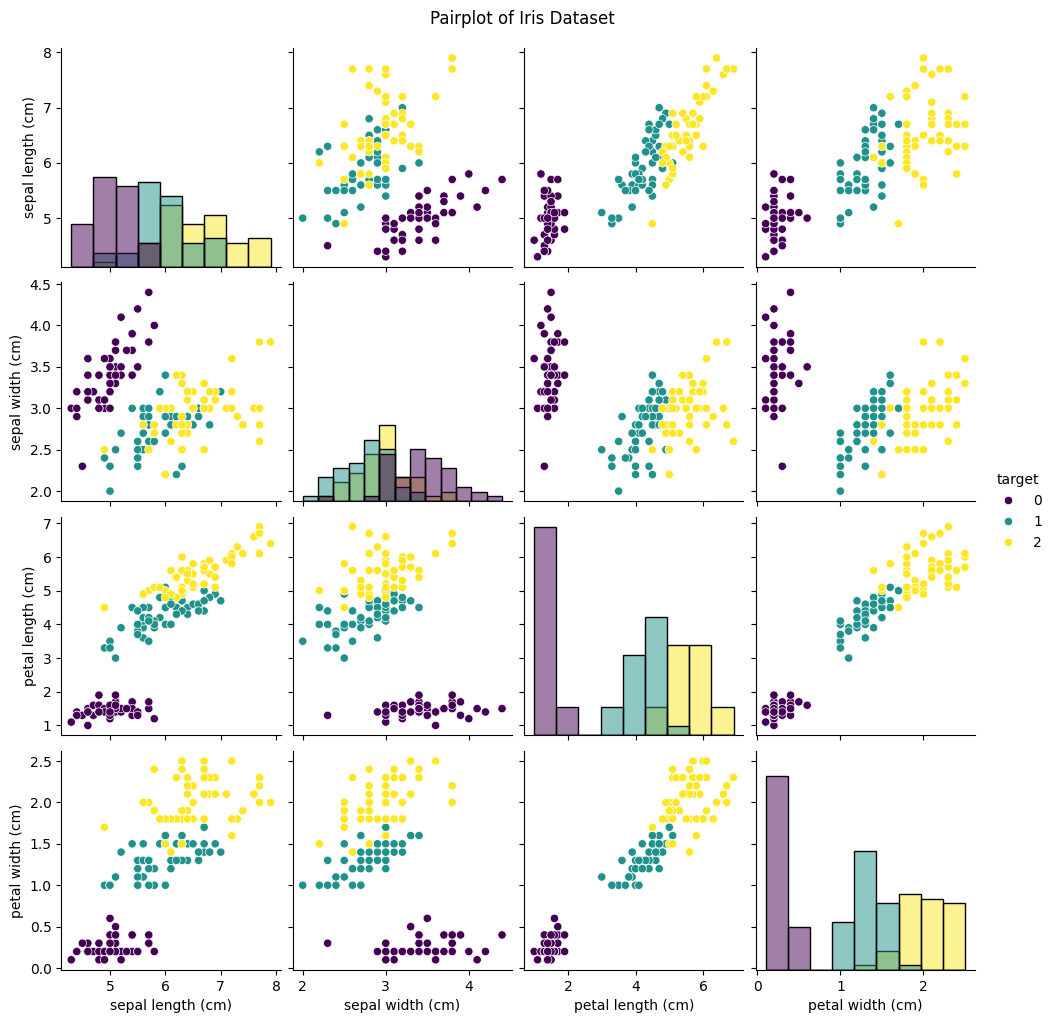

In [8]:
# EDA: Pairplot to visualize relationships between features
sns.pairplot(iris_df, hue='target', palette='viridis', diag_kind='hist')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

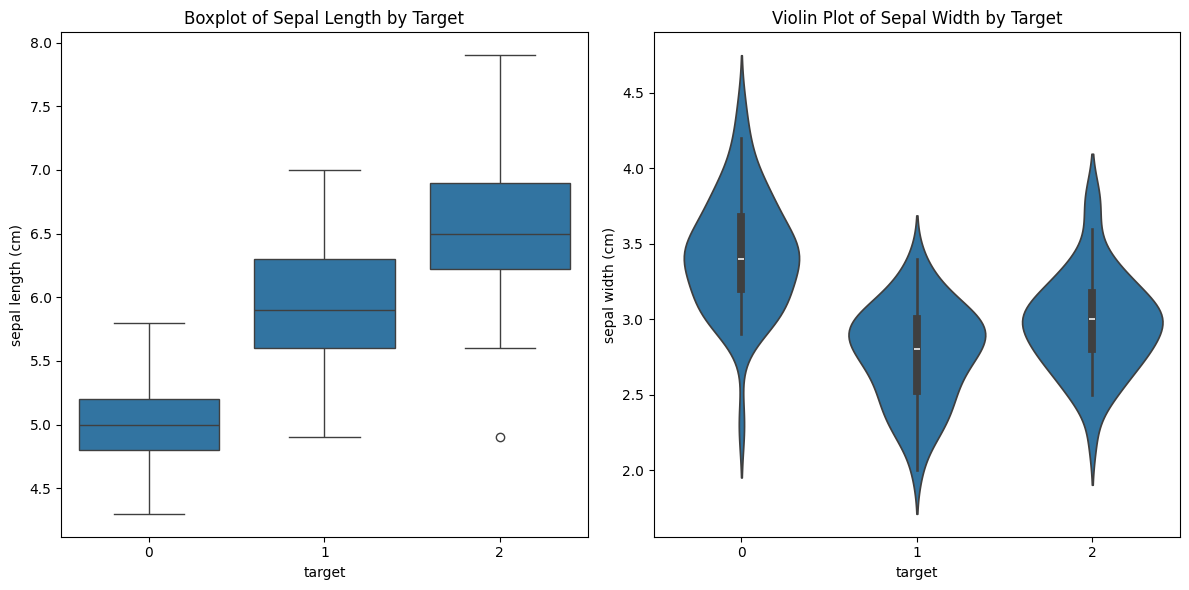

In [9]:
# Other Plots
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='target', y='sepal length (cm)', data=iris_df)
plt.title('Boxplot of Sepal Length by Target')

# Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='target', y='sepal width (cm)', data=iris_df)
plt.title('Violin Plot of Sepal Width by Target')

plt.tight_layout()
plt.show()

<ipython-input-10-9f07f7c941b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=iris_df, palette='viridis')


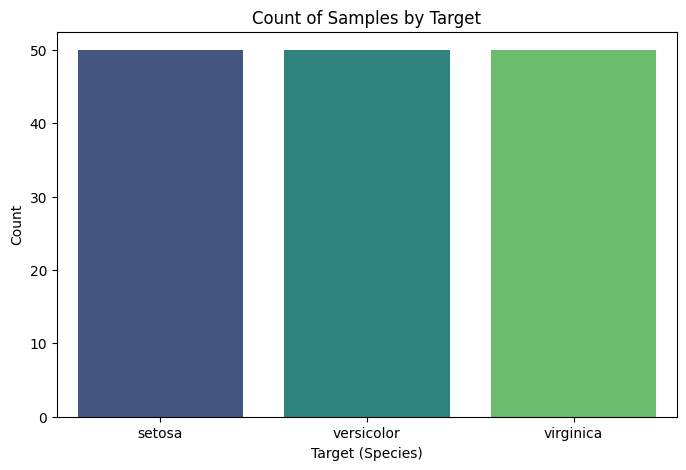

In [10]:
# Count Plot (Bar Plot)
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=iris_df, palette='viridis')
plt.title('Count of Samples by Target')
plt.xlabel('Target (Species)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show()

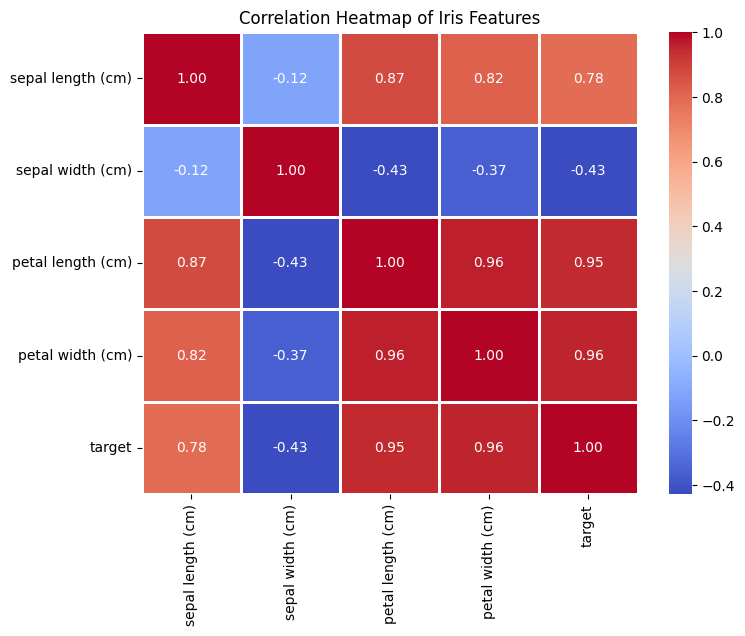

In [11]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='white')
plt.title('Correlation Heatmap of Iris Features')
plt.show()

### Split the data into features and target

In [12]:
# Separate features (X) and target (y) from the DataFrame
X = iris_df.drop('target', axis=1)  # Features
y = iris_df['target']               # Target (labels)


### Split the data into train and test

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Standardized the data

In [14]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Model Building

In [17]:
# Initialize the Logistic Regression model
model = LogisticRegression(multi_class="multinomial")

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

### Calculate the training and testing accuracy

In [18]:
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9666666666666667
Testing Accuracy: 1.0


### Create a confusion matrix

In [19]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### Print the classification report

In [20]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
# Print probabilities of classification for the first few samples in the test set
print("\nProbabilities of Classification:")
probabilities = model.predict_proba(X_test[:5])
for i, prob in enumerate(probabilities):
    print(f"Sample {i+1}: {list(zip(iris.target_names, prob))}")


Probabilities of Classification:
Sample 1: [('setosa', 0.011447507322412825), ('versicolor', 0.8760142656702462), ('virginica', 0.112538227007341)]
Sample 2: [('setosa', 0.9643690039475001), ('versicolor', 0.03563058526562053), ('virginica', 4.10786879320389e-07)]
Sample 3: [('setosa', 3.7676833830242925e-08), ('versicolor', 0.002880646730071478), ('virginica', 0.9971193155930947)]
Sample 4: [('setosa', 0.013202874946235753), ('versicolor', 0.7595970682706119), ('virginica', 0.2272000567831524)]
Sample 5: [('setosa', 0.0018873691348218903), ('versicolor', 0.7521918395331634), ('virginica', 0.2459207913320148)]
